In [2]:
import torch
import torch.nn as nn
import midi_utils
import mido

from importlib import reload

reload(midi_utils) # To reflect the changes.

<module 'midi_utils' from '/home/volod/work/personal/music-gen/midi_utils.py'>

In [5]:
notes, raw_msgs = midi_utils.notes_dataset("./datasets/jazz_kaggle")

Fail to read ./datasets/jazz_kaggle/DarnThatDream.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/AnyWayYouWantIt.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/Lights.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/LovinTouchinSqueezin.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/Moment.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/AffairInSanMiguel.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/Lakes.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/BigSky.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/RoadWarriors.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/BraveNewWorld.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/CurvesAhead.mid: data byte must be in range 0..127
Fail to read ./datasets/jazz_kaggle/Dest

4496

In [6]:
torch.manual_seed(42) 

notes_in_seq = 4
feature_size = notes_in_seq * len(Note.__dataclass_fields__)

model = nn.Sequential(
    nn.Linear(in_features=feature_size, out_features=60),
    nn.ReLU(),
    nn.Linear(in_features=60, out_features=30),
    nn.ReLU(),
    nn.Linear(in_features=30, out_features=feature_size // notes_in_seq),
)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.01)

In [28]:
from torch.utils.data import DataLoader, Dataset

# Fake data.
X = torch.randn((1000, feature_size))
y = torch.randn((1000, feature_size // notes_in_seq))
train_loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=16)

X_test = torch.randn((200, feature_size))
y_test = torch.randn((200, feature_size // notes_in_seq))
test_loader = DataLoader(list(zip(X_test,y_test)), shuffle=True, batch_size=16)

In [29]:
epochs = 1000

test_losses = []
steps = []

for epoch in range(epochs):
    for i, (X, y) in enumerate(test_loader):
        i += epoch
        model.train()

        pred = model(X)

        loss = loss_func(pred, y)
        loss.backward()

        test_losses.append(loss.item())
        steps.append(i)

        optim.step()
        optim.zero_grad()

        model.eval()
        with torch.inference_mode():
            # X_test, y_test = next(test_loader)
            # pred = model(X)
            # loss = loss_func(pred, y)
            # loss.backward()
            # test_losses.append(loss)
            # Calculate validation loss of the model.
            pass

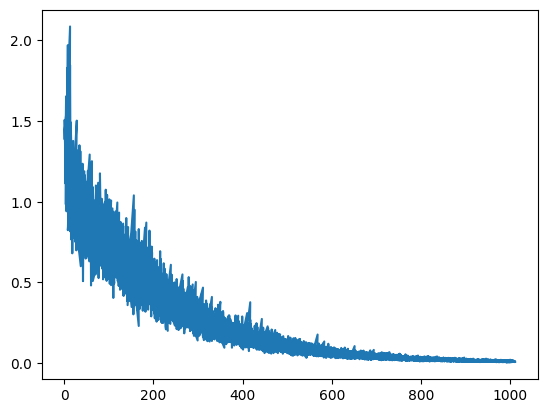

In [30]:
import matplotlib.pyplot as plt

plt.plot(steps, test_losses)

In [55]:
from torch.utils.data import DataLoader

X = torch.rand((100, 2))
y = torch.rand((100, 1))

loader = DataLoader(list(zip(X, y)), batch_size=25, shuffle=True)

In [31]:
test_losses[-1]

0.007875013165175915